# **Tokenizer**

## O que é (What is it?)

Um tokenizer é uma ferramenta que divide um texto em partes menores chamadas tokens. Os tokens podem ser palavras, subpalavras, ou até mesmo caracteres individuais, dependendo do tipo de tokenizer e do objetivo. Esse processo de tokenização é fundamental para que os modelos de IA e aprendizado de máquina possam entender e processar o texto.
Imagine que você tem uma frase como:

"Eu adoro chocolate!"

Por palavras: ["Eu", "adoro", "chocolate", "!"]  
Por subpalavras: ["Eu", "ado", "ro", "choco", "late", "!"]  
Por caracteres: ["E", "u", "a", "d", "o", "r", "o", "c", "h", "o", "c", "o", "l", "a", "t", "e", "!"]  

## Exemplos de uso (Usage examples)

Nesta seção vamos explorar 3 tipos de tokenizadores:
1. Tiktoken
2. Tokenizers prontos (hugging face)
3. Tokenizers pré treinados (hugging face)

### Tiktoken

Pontos importantes de uso. O tiktoken é utilizado quando se tem interação com o chatGPT, é uma biblioteca criada pela openAI e ela é util para:
`contagem de tokens`, você precisa saber isso para enviar seu texto para a API do chatGPT por exemplo. Esse modulo é extremamente `rapido`.

### Tokenizers prontos (Hugging Face)

Você pode utilizar o `AutoTokenizer`, ou por exemplo se sabe a familia que seu tokenizer pertence como por exemplo google-bert/bert-base-uncased você pode usar `BertTokenizer`

In [1]:
from transformers import AutoTokenizer, BertTokenizer

In [3]:
auto_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
bert_tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")

In [4]:
texto = 'Esse texto que será tokenizado.'
tokens_auto_tokenizer = auto_tokenizer.tokenize(texto)
tokens_bert_tokenizer = bert_tokenizer.tokenize(texto)

print(f'TOKENS AUTO TOKENIZER: {tokens_auto_tokenizer}')
print(f'TOKENS BERT TOKENIZER: {tokens_bert_tokenizer}`')
print(f'Os tokens são iguais: {tokens_auto_tokenizer == tokens_bert_tokenizer}')

TOKENS AUTO TOKENIZER: ['es', '##se', 'text', '##o', 'que', 'sera', 'token', '##iza', '##do', '.']
TOKENS BERT TOKENIZER: ['es', '##se', 'text', '##o', 'que', 'sera', 'token', '##iza', '##do', '.']`
Os tokens são iguais: True


Você pode utilizar tokenizer já treinados disponibilizados no hugging face. Para isso basta saber o nome do tokenizer que deseja utilizar:
`google-bert/bert-base-uncased` ou `xlnet/xlnet-base-cased` por exemplo.

Podemos utilizar um tokenizer focado no português `pierreguillou/bert-base-cased-squad-v1.1-portuguese`

In [5]:
tokenizer = AutoTokenizer.from_pretrained("pierreguillou/bert-base-cased-squad-v1.1-portuguese")
tokens = tokenizer.tokenize(texto)
print(f'TOKENS BERT BASE PT-BT: {tokens}')

TOKENS BERT BASE PT-BT: ['Esse', 'texto', 'que', 'será', 'to', '##ken', '##izado', '.']


In [6]:
# podemos encodar de tokens para ids
token_ids = tokenizer.encode(texto, add_special_tokens=False)
print(f'TOKENS IDS: {token_ids}')

TOKENS IDS: [3758, 4054, 179, 2810, 374, 8110, 2303, 119]


In [7]:
# e voltar de tokens ids para texto
texto = tokenizer.decode(token_ids)
texto

'Esse texto que será tokenizado.'

In [10]:
# podemos ver os tokens especiais do nosso tokenizador e seus ids
print('TOKENS ESPECIAIS: \n', tokenizer.special_tokens_map)
special_token_ids = {
    token: tokenizer.convert_tokens_to_ids(token) for token in tokenizer.special_tokens_map.values()
}
print('\nTOKENS ESPECIAIS: \n', special_token_ids)

TOKENS ESPECIAIS: 
 {'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}

TOKENS ESPECIAIS: 
 {'[UNK]': 100, '[SEP]': 102, '[PAD]': 0, '[CLS]': 101, '[MASK]': 103}


Utilizando o tokenizer você pode deixar bem definido algumas configurações importantes, como por exemplo, truncar ou adicionar o token de PAD aos tokens conforme um max_lenght especifico, falar qual será o tipo da saída, tensor pytorch, numpy aray, tensorflow etc.

In [34]:
texto = 'Esse texto será tokenizado, com configurações.'

tokens = tokenizer(
    texto,  # o que será tokenizado
    add_special_tokens=True,  # adiciona os tokens especiais [CLS], [SEP]
    max_length=16,  # tamanho do texto, o que for menor que 16 é preenchido por [PAD] o que for maior é truncado
    truncation=True,  # Deixa explicito que será truncado
    padding='max_length',  # Adiciona [PAD] até se ter o max_length desejado
    return_tensors='pt'  # retorna pytorch tensores
)

In [41]:
print('RETORNO DO TOKENIZER:\n', tokens)

RETORNO DO TOKENIZER:
 {'input_ids': tensor([[ 101, 3758, 4054, 2810,  374, 8110, 2303,  117,  170, 6732, 2406,  119,
          102,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}


In [42]:
print('TOKENS GERADOS: \n', tokens['input_ids'])

TOKENS GERADOS: 
 tensor([[ 101, 3758, 4054, 2810,  374, 8110, 2303,  117,  170, 6732, 2406,  119,
          102,    0,    0,    0]])


In [43]:
print('VOLTANDO DE TOKENS PARA PALAVRAS: \n', tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True))

VOLTANDO DE TOKENS PARA PALAVRAS: 
 Esse texto será tokenizado, com configurações.


In [44]:
tokenizer(['Texto um dois três', 'Texto X P T O ponto final.'])

{'input_ids': [[101, 21791, 183, 222, 682, 864, 102], [101, 21791, 183, 767, 212, 267, 231, 2009, 774, 119, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

### Treinando seu tokenizer (Hugging Face)

In [59]:
from tokenizers import (
    Tokenizer,
    models,
    pre_tokenizers,
    trainers
)

In [88]:
tokenizer = Tokenizer(models.WordLevel(unk_token="[UNK]"))

In [89]:
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

In [90]:
texto = 'Esse texto será tokenizado por palavra.'
print(tokenizer.pre_tokenizer.pre_tokenize_str(texto))

[('Esse', (0, 4)), ('texto', (5, 10)), ('será', (11, 15)), ('tokenizado', (16, 26)), ('por', (27, 30)), ('palavra', (31, 38)), ('.', (38, 39))]


In [91]:
trainer = trainers.WordLevelTrainer(vocab_size=10, special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"])

In [92]:
tokenizer.train_from_iterator(["esse é um texto teste"], trainer=trainer)

output = tokenizer.encode("esse é maça")

output.tokens

['esse', 'é', '[UNK]']

In [93]:
tokenizer.get_vocab()

{'é': 9,
 '[SEP]': 3,
 '[CLS]': 2,
 'teste': 6,
 '[UNK]': 1,
 'texto': 7,
 'um': 8,
 'esse': 5,
 '[PAD]': 0,
 '[MASK]': 4}

#### Normalizers

As vezes você pode desejar normalizar o texto, ou seja, fazer transformações no texto antes de tokenizar, como remover ascentos, deixar tudo minusculo, remover mais de um espaço em branco vamos fazer isso.

In [104]:
from tokenizers import normalizers, Regex

In [126]:
tokenizer.normalizer = normalizers.Sequence(
    [
        normalizers.Lowercase(),  # Normalizador de minúsculas
        normalizers.Replace("maça", "texto"),  # Substituir normalizador
        normalizers.NFC(),  # Normalizador NFC Unicode
        normalizers.NFD(),  # Normalizador NFC Unicode
        normalizers.NFKC(),  # Normalizador Unicode NFKC
        normalizers.NFKD(),  # Normalizador Unicode NFKD
        normalizers.Prepend('teste '),  # adiciona um prefixo no texto
        normalizers.Strip(),  # Remove espaços em branco no início e no final do texto.
        normalizers.StripAccents()  # Remove acentos e diacríticos dos caracteres.
    ]
)

In [143]:
tokenizer.train_from_iterator(["esse é um texto teste"], trainer=trainer)

output = tokenizer.encode("[CLS] esse é maça [PAD]")

output.tokens

['[CLS]', 'teste', 'esse', 'e', 'texto', '[PAD]']

In [144]:
output.ids

[2, 5, 7, 6, 8, 0]

In [134]:
from transformers import PreTrainedTokenizerFast

In [135]:
wrapped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer,
    bos_token="[SEP]",
    eos_token="[SEP]",
    unk_token="[UNK]",
    pad_token="[PAD]",
    mask_token="[MASK]",
    cls_token="[CLS]",
)

/media/agentsmith/Novo volume/disco M/Python/venvs/env_linux/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [137]:
wrapped_tokenizer.encode('esse é maça', add_special_tokens=)

[5, 7, 6, 8]

## Refeências (References)

- [tiktoken](https://github.com/openai/tiktoken)
- [tiktoken cookbook](https://cookbook.openai.com/examples/how_to_count_tokens_with_tiktoken)
- [Aula Andrej Karpathy](https://www.youtube.com/watch?v=zduSFxRajkE&t=369s)
- [Hugging Face - Tokenize](https://huggingface.co/docs/transformers/main_classes/tokenizer)
- [Hugging Face](https://huggingface.co/docs/tokenizers/index)
- [tiktokenizer](https://tiktokenizer.vercel.app/)

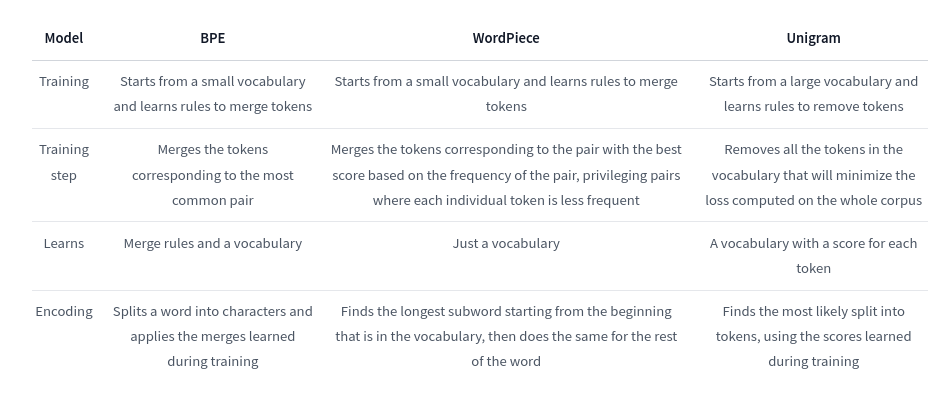